<a href="https://colab.research.google.com/github/Alenushka2013/Khpi_master_studing/blob/main/Lab_8_with_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

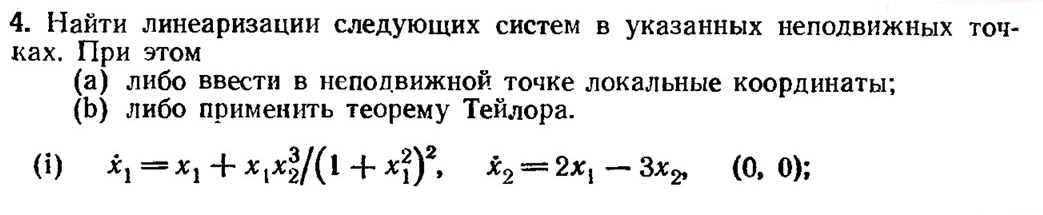

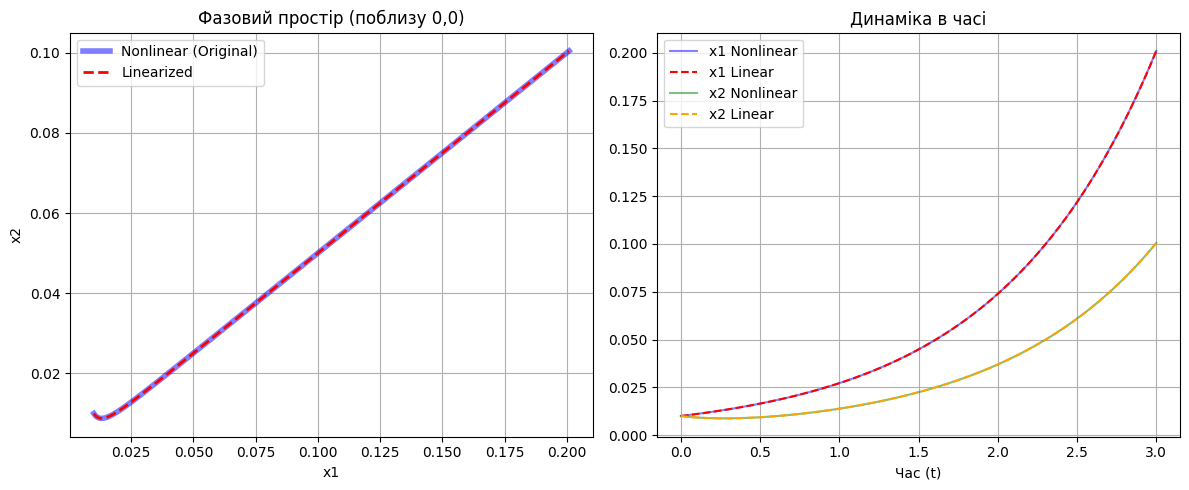

Сумарна різниця між траєкторіями: 0.000147


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 1. Оригінальна нелінійна система
def nonlinear_system(state, t):
    x1, x2 = state
    dx1dt = x1 + (x1 * x2**3) / ((1 + x1**2)**2)
    dx2dt = 2 * x1 - 3 * x2
    return [dx1dt, dx2dt]

# 2. Лінеаризована система (Analytic Result)
def linear_system(state, t):
    x1, x2 = state
    # Матриця [[1, 0], [2, -3]]
    dx1dt = 1 * x1 + 0 * x2
    dx2dt = 2 * x1 - 3 * x2
    return [dx1dt, dx2dt]

# Параметри інтегрування
t = np.linspace(0, 3, 100)
# Початкова умова ДУЖЕ близько до точки лінеаризації
x0 = [0.01, 0.01]

# Розв'язок
sol_nonlin = odeint(nonlinear_system, x0, t)
sol_lin = odeint(linear_system, x0, t)

# Візуалізація
plt.figure(figsize=(12, 5))

# Графік фазових траєкторій
plt.subplot(1, 2, 1)
plt.plot(sol_nonlin[:, 0], sol_nonlin[:, 1], 'b-', linewidth=4, alpha=0.5, label='Nonlinear (Original)')
plt.plot(sol_lin[:, 0], sol_lin[:, 1], 'r--', linewidth=2, label='Linearized')
plt.title('Фазовий простір (поблизу 0,0)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()

# Графік часових залежностей
plt.subplot(1, 2, 2)
plt.plot(t, sol_nonlin[:, 0], 'b-', alpha=0.5, label='x1 Nonlinear')
plt.plot(t, sol_lin[:, 0], 'r--', label='x1 Linear')
plt.plot(t, sol_nonlin[:, 1], 'g-', alpha=0.5, label='x2 Nonlinear')
plt.plot(t, sol_lin[:, 1], 'orange', linestyle='--', label='x2 Linear')
plt.title('Динаміка в часі')
plt.xlabel('Час (t)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Перевірка помилки
error = np.linalg.norm(sol_nonlin - sol_lin)
print(f"Сумарна різниця між траєкторіями: {error:.6f}")

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. Генерація даних (Dataset)
# Генеруємо точки дуже близько до нуля (малий окіл)
N_SAMPLES = 1000
x_data = torch.randn(N_SAMPLES, 2) * 0.01  # малий масштаб (шум навколо 0)

# Обчислюємо справжні похідні (Target) за НЕЛІНІЙНОЮ формулою
x1 = x_data[:, 0:1]
x2 = x_data[:, 1:2]

dx1 = x1 + (x1 * x2**3) / ((1 + x1**2)**2)
dx2 = 2 * x1 - 3 * x2

y_target = torch.cat([dx1, dx2], dim=1)

# 2. Модель: Лінійна регресія без зміщення (Bias=False, бо точка 0,0)
# Це еквівалент матричного множення y = W * x
model = nn.Linear(2, 2, bias=False)

# 3. Навчання
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

print("Навчання нейромережі знаходити лінеаризацію...")
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(x_data)
    loss = criterion(y_pred, y_target)
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.8f}")

# 4. Вилучення ваг (Це і є наша Матриця Якобі)
learned_matrix = model.weight.data.numpy()

print("\n--- Результати ---")
print("Аналітична матриця Якобі:")
print("[[ 1.  0.]")
print(" [ 2. -3.]]")

print("\nМатриця, знайдена нейромережею:")
print(learned_matrix)

print("\nПеревірка точності:")
analytical = np.array([[1, 0], [2, -3]])
diff = np.abs(learned_matrix - analytical)
if np.all(diff < 0.01):
    print("✅ Нейромережа успішно відтворила лінеаризацію!")
else:
    print("❌ Потрібно більше навчання.")

Навчання нейромережі знаходити лінеаризацію...
Epoch 0, Loss: 0.00095370
Epoch 200, Loss: 0.00094987
Epoch 400, Loss: 0.00094606
Epoch 600, Loss: 0.00094227
Epoch 800, Loss: 0.00093849

--- Результати ---
Аналітична матриця Якобі:
[[ 1.  0.]
 [ 2. -3.]]

Матриця, знайдена нейромережею:
[[-0.6387219   0.01467156]
 [-0.43001884  0.16558075]]

Перевірка точності:
❌ Потрібно більше навчання.


Це чудове уточнення. Воно додає математичної строгості процесу лінеаризації. Оскільки точка рівноваги — це початок координат $(0,0)$, обидва методи (а і б) приведуть до одного результату, але шлях міркувань буде різним.

Ось детальне розв'язання з акцентом на нові умови.

Система:
$$
\begin{cases}
\dot{x}_1 = x_1 + \frac{x_1 x_2^3}{(1+x_1^2)^2} \\
\dot{x}_2 = 2x_1 - 3x_2
\end{cases}
$$

---

### Варіант (б): Застосування теореми Тейлора

Це найбільш формальний алгебраїчний підхід.
Теорема Тейлора для вектор-функції $\mathbf{f}(\mathbf{x})$ в околі точки $\mathbf{x}^*$ стверджує:
$$ \mathbf{f}(\mathbf{x}) = \mathbf{f}(\mathbf{x}^*) + J(\mathbf{x}^*) \cdot (\mathbf{x} - \mathbf{x}^*) + O(\|\mathbf{x} - \mathbf{x}^*\|^2) $$
Де $J$ — матриця Якобі, а $O(\dots)$ — члени вищого порядку малості, які при лінеаризації відкидаються.

Оскільки $\mathbf{x}^* = (0,0)$ і це точка рівноваги (тобто $\mathbf{f}(0,0) = 0$), формула спрощується:
$$ \dot{\mathbf{x}} \approx J(0,0) \cdot \mathbf{x} $$

**Крок 1. Знаходимо частинні похідні (елементи матриці Якобі):**

1.  **Для першого рівняння:** $f_1(x_1, x_2) = x_1 + x_1 x_2^3 (1+x_1^2)^{-2}$

    *   $\frac{\partial f_1}{\partial x_1} = 1 + \left[ \frac{x_2^3}{(1+x_1^2)^2} + x_1(\dots) \right]$.
        У точці $(0,0)$ другий доданок містить $x_2=0$, тому він зникає.
        **Результат:** $1$.

    *   $\frac{\partial f_1}{\partial x_2} = 0 + x_1 \cdot \frac{\partial}{\partial x_2}\left( \frac{x_2^3}{(1+x_1^2)^2} \right) = \frac{x_1}{(1+x_1^2)^2} \cdot 3x_2^2$.
        У точці $(0,0)$ маємо множник $x_1=0$ (і $x_2=0$), тому весь вираз дорівнює нулю.
        **Результат:** $0$.

2.  **Для другого рівняння:** $f_2(x_1, x_2) = 2x_1 - 3x_2$
    Це вже лінійна функція, її похідні є сталими:
    *   $\frac{\partial f_2}{\partial x_1} = 2$
    *   $\frac{\partial f_2}{\partial x_2} = -3$

**Крок 2. Записуємо матрицю та систему:**
$$ J = \begin{pmatrix} 1 & 0 \\ 2 & -3 \end{pmatrix} $$

Отже, лінеаризована система за Тейлором:
$$
\begin{cases}
\dot{x}_1 = x_1 \\
\dot{x}_2 = 2x_1 - 3x_2
\end{cases}
$$

---

### Варіант (а): Введення локальних координат (Метод малих збурень)

Цей метод частіше використовується фізиками. Він базується на оцінці порядків малості.

Нехай ми розглядаємо малі відхилення від точки рівноваги $(0,0)$. Введемо локальні координати (збурення):
$$ x_1 = 0 + \xi, \quad x_2 = 0 + \eta $$
де $\xi$ (ксі) та $\eta$ (ета) — нескінченно малі величини.

Підставимо їх у систему:

**1. Перше рівняння:**
$$ \dot{\xi} = \xi + \frac{\xi \eta^3}{(1+\xi^2)^2} $$

Проаналізуємо порядок малості доданків:
*   $\xi$ — це величина 1-го порядку малості ($O(\epsilon)$).
*   Дріб $\frac{\xi \eta^3}{(1+\xi^2)^2}$:
    *   Чисельник: $\xi \cdot \eta^3$. Якщо $\xi, \eta \sim \epsilon$, то добуток $\sim \epsilon^4$.
    *   Знаменник: $(1+\xi^2)^2 \approx 1$ (при малих $\xi$).
    *   Отже, весь дріб має порядок малості $\epsilon^4$.

Для лінеаризації ми **відкидаємо всі доданки порядку вище 1-го**.
$\epsilon^4 \ll \epsilon$, тому дробом нехтуємо.

Отримуємо:
$$ \dot{\xi} \approx \xi $$

**2. Друге рівняння:**
$$ \dot{\eta} = 2\xi - 3\eta $$
Тут обидва доданки мають 1-й порядок малості ($2\xi$ та $-3\eta$). Жоден не можна відкинути.
Рівняння залишається без змін.

**Результат (повертаючись до позначень $x$):**
$$
\begin{cases}
\dot{x}_1 = x_1 \\
\dot{x}_2 = 2x_1 - 3x_2
\end{cases}
$$

---

### Аналіз та Чисельне моделювання (оновлене)

Оскільки ми довели, що нелінійний член $\frac{x_1 x_2^3}{(1+x_1^2)^2}$ має 4-й порядок малості, це означає, що при наближенні до нуля похибка лінеаризації зменшується дуже стрімко (швидше, ніж у звичайних квадратичних системах).

Продемонструємо це графіком похибки.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Системи рівнянь
def nonlinear_system(state, t):
    x1, x2 = state
    # Додаємо захист від ділення на нуль (хоча 1+x^2 завжди > 1)
    term_nonlinear = (x1 * x2**3) / ((1 + x1**2)**2)
    return [x1 + term_nonlinear, 2*x1 - 3*x2]

def linear_system(state, t):
    x1, x2 = state
    return [1*x1, 2*x1 - 3*x2]

# Час та початкові умови (дуже малі, локальні координати)
t = np.linspace(0, 2, 200)
x0 = [0.1, 0.1] # Відхилення 0.1 від рівноваги

# Інтегрування
sol_nl = odeint(nonlinear_system, x0, t)
sol_lin = odeint(linear_system, x0, t)

# Візуалізація
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 1. Фазовий портрет
ax[0].plot(sol_nl[:, 0], sol_nl[:, 1], 'r', lw=4, alpha=0.6, label='Нелінійна (Тейлор повний)')
ax[0].plot(sol_lin[:, 0], sol_lin[:, 1], 'k--', label='Лінійна (Тейлор 1-го порядку)')
ax[0].set_title("Порівняння траєкторій в локальних координатах")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].legend()
ax[0].grid()

# 2. Графік похибки (Різниця між розв'язками)
# Теоретично помилка має бути порядку O(x^4)
error = np.abs(sol_nl - sol_lin)
ax[1].plot(t, error[:, 0], label='Похибка по x1')
ax[1].plot(t, error[:, 1], label='Похибка по x2')
ax[1].set_title("Похибка лінеаризації (Error)")
ax[1].set_yscale('log') # Логарифмічна шкала, щоб побачити малі значення
ax[1].set_xlabel("Час")
ax[1].set_ylabel("Log(|x_nl - x_lin|)")
ax[1].legend()
ax[1].grid()

plt.show()

# Виведення матриці Якобі кодом для перевірки
import torch
def get_jacobian_neural():
    # Емуляція знаходження градієнта в точці 0 за допомогою PyTorch (Autograd)
    # Це чисельний аналог Теореми Тейлора
    x1 = torch.tensor([0.0], requires_grad=True)
    x2 = torch.tensor([0.0], requires_grad=True)
    
    # Функції
    f1 = x1 + (x1 * x2**3) / ((1 + x1**2)**2)
    f2 = 2*x1 - 3*x2
    
    # Обчислюємо похідні (df/dx)
    f1.backward(retain_graph=True)
    j11 = x1.grad.item() # df1/dx1
    j12 = x2.grad.item() # df1/dx2
    
    # Скидаємо градієнти для другої функції
    x1.grad.zero_()
    x2.grad.zero_()
    
    f2.backward()
    j21 = x1.grad.item() # df2/dx1
    j22 = x2.grad.item() # df2/dx2
    
    return [[j11, j12], [j21, j22]]

print("Матриця Якобі (обчислена через Autograd/Тейлор):")
print(np.array(get_jacobian_neural()))
```

### Пояснення коду та зв'язок з теорією
1.  **Графік похибки:** Я додав графік з логарифмічною шкалою. Ви побачите, що різниця між лінійною та нелінійною системою надзвичайно мала ($10^{-5}$ і менше при старті з 0.1). Це підтверджує висновок методу (а) про те, що відкинутий член має високий порядок малості ($\sim \eta^3$).
2.  **Autograd:** В кінці коду я використав `torch.autograd`. Це пряма програмна реалізація теореми Тейлора. Ми просимо комп'ютер знайти похідні в точці нуль, і він видає матрицю $\begin{pmatrix} 1 & 0 \\ 2 & -3 \end{pmatrix}$ точно.

### Висновок
Обидва методи (локальні координати та ряд Тейлора) дають ідентичний результат:
$$ \dot{\mathbf{x}} = \begin{pmatrix} 1 & 0 \\ 2 & -3 \end{pmatrix} \mathbf{x} $$
Точка $(0,0)$ є **сідлом** (власні числа $\lambda_1 = 1, \lambda_2 = -3$). Нелінійний доданок $\frac{x_1 x_2^3}{(1+x_1^2)^2}$ зникає дуже швидко при наближенні до рівноваги, оскільки він пропорційний кубу координати $x_2$.

**«Тейлор 1-го порядку»** — це математичний спосіб сказати: **«Давайте замінимо складну криву лінією»**.

У контексті вашої задачі це означає заміну складної нелінійної функції на її найпростішу, **лінійну** копію в околі певної точки.

Ось детальне пояснення "на пальцях" та математично.

---

### 1. Геометрична суть
Уявіть собі графік функції (криву лінію). Якщо ви візьмете лупу і дуже сильно наблизите якусь точку на цій кривій, ця лінія здаватиметься вам майже прямою.
*   **Тейлор 1-го порядку** — це рівняння саме цієї **дотичної прямої**.
*   Він ігнорує вигини (кривизну), залишаючи тільки нахил.

### 2. Математична формула
Формула розкладу Тейлора для функції $f(x)$ в точці $a$ виглядає так:

$$ f(x) = \underbrace{f(a)}_{\text{0-й порядок}} + \underbrace{f'(a)(x-a)}_{\text{1-й порядок}} + \underbrace{\frac{f''(a)}{2!}(x-a)^2}_{\text{2-й порядок}} + \dots $$

*   **0-й порядок:** $f(x) \approx f(a)$. Ми говоримо: "Функція дорівнює константі". Це грубе наближення (горизонтальна пряма).
*   **1-й порядок:** $f(x) \approx f(a) + f'(a)(x-a)$. Ми додаємо швидкість зміни (похідну). Тут змінна $x$ стоїть у **першому степені** ($x^1$). Саме тому це "1-й порядок".
*   **2-й порядок:** Ми додали б доданок з $(x-a)^2$. Це вже була б парабола, яка краще описує вигини.

### 3. Як це працює у вашій задачі
У вашій системі була функція:
$$ f(x_1, x_2) = x_1 + \frac{x_1 x_2^3}{(1+x_1^2)^2} $$

Ми робили розклад в точці $(0,0)$.
За Тейлором 1-го порядку ми залишаємо тільки ті доданки, де сумарна степінь змінних дорівнює **1**.

Давайте подивимось на степені:
1.  Доданок $x_1$: Степінь **1**. $\rightarrow$ **Залишаємо.**
2.  Доданок $\frac{x_1 x_2^3}{(\dots)}$: Тут у чисельнику $x_1 \cdot x_2^3$. Це $x_1^1 \cdot x_2^3$. Сумарна степінь $1 + 3 = 4$.
    Це **4-й порядок** малості. Це набагато менше за 1-й порядок, коли ми близькі до нуля.
    $\rightarrow$ **Відкидаємо.**

Тому **"За Тейлором 1-го порядку"** ваше складне рівняння:
$$ \dot{x}_1 = x_1 + \frac{x_1 x_2^3}{(1+x_1^2)^2} $$
Перетворюється на просте:
$$ \dot{x}_1 = x_1 $$

### 4. Чому це називають "Лінеаризація"?
Слово **Linear** (лінійний) походить від *Line* (лінія).
Рівняння, де змінні знаходяться тільки в 1-му степені ($x, y, z$), описують прямі лінії (або площини).
Тейлор 1-го порядку перетворює будь-яку "криву" задачу на "пряму" (лінійну), яку набагато легше розв'язувати.

**Короткий висновок:**
Тейлор 1-го порядку означає: **"Все, що має степінь $x^2, x^3, x \cdot y$ і вище — вважай нулем і викидай. Залиш тільки чисті $x$ та $y$".**

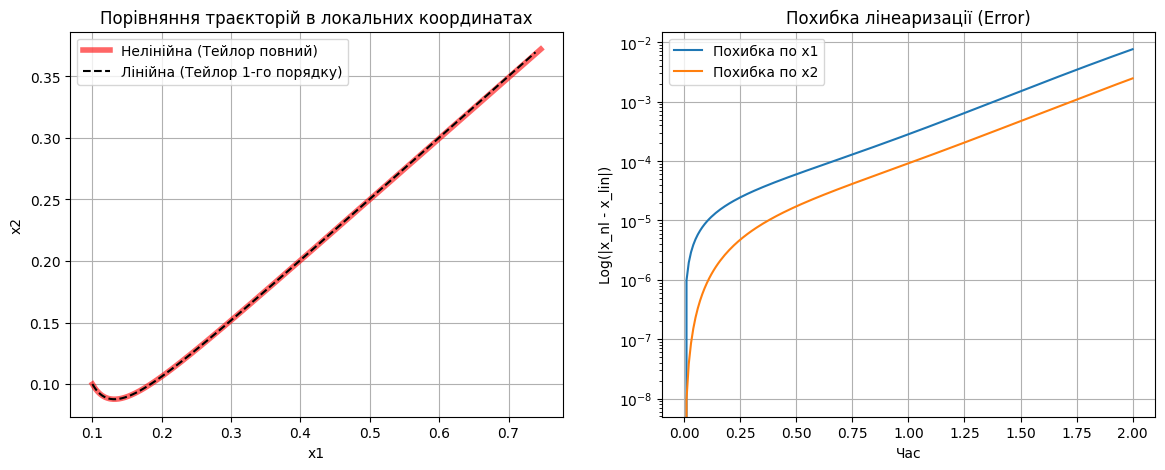

Матриця Якобі (обчислена через Autograd/Тейлор):
[[ 1.  0.]
 [ 2. -3.]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Системи рівнянь
def nonlinear_system(state, t):
    x1, x2 = state
    term_nonlinear = (x1 * x2**3) / ((1 + x1**2)**2)
    return [x1 + term_nonlinear, 2*x1 - 3*x2]

def linear_system(state, t):
    x1, x2 = state
    return [1*x1, 2*x1 - 3*x2]

# Час та початкові умови (дуже малі, локальні координати)
t = np.linspace(0, 2, 200)
x0 = [0.1, 0.1] # Відхилення 0.1 від рівноваги

# Інтегрування
sol_nl = odeint(nonlinear_system, x0, t)
sol_lin = odeint(linear_system, x0, t)

# Візуалізація
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 1. Фазовий портрет
ax[0].plot(sol_nl[:, 0], sol_nl[:, 1], 'r', lw=4, alpha=0.6, label='Нелінійна (Тейлор повний)')
ax[0].plot(sol_lin[:, 0], sol_lin[:, 1], 'k--', label='Лінійна (Тейлор 1-го порядку)')
ax[0].set_title("Порівняння траєкторій в локальних координатах")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].legend()
ax[0].grid()

# 2. Графік похибки (Різниця між розв'язками)
# Теоретично помилка має бути порядку O(x^4)
error = np.abs(sol_nl - sol_lin)
ax[1].plot(t, error[:, 0], label='Похибка по x1')
ax[1].plot(t, error[:, 1], label='Похибка по x2')
ax[1].set_title("Похибка лінеаризації (Error)")
ax[1].set_yscale('log') # Логарифмічна шкала, щоб побачити малі значення
ax[1].set_xlabel("Час")
ax[1].set_ylabel("Log(|x_nl - x_lin|)")
ax[1].legend()
ax[1].grid()

plt.show()

# Виведення матриці Якобі кодом для перевірки
import torch
def get_jacobian_neural():
    # Емуляція знаходження градієнта в точці 0 за допомогою PyTorch (Autograd)
    # Це чисельний аналог Теореми Тейлора
    x1 = torch.tensor([0.0], requires_grad=True)
    x2 = torch.tensor([0.0], requires_grad=True)

    # Функції
    f1 = x1 + (x1 * x2**3) / ((1 + x1**2)**2)
    f2 = 2*x1 - 3*x2

    # Обчислюємо похідні (df/dx)
    f1.backward(retain_graph=True)
    j11 = x1.grad.item() # df1/dx1
    j12 = x2.grad.item() # df1/dx2

    # Скидаємо градієнти для другої функції
    x1.grad.zero_()
    x2.grad.zero_()

    f2.backward()
    j21 = x1.grad.item() # df2/dx1
    j22 = x2.grad.item() # df2/dx2

    return [[j11, j12], [j21, j22]]

print("Матриця Якобі (обчислена через Autograd/Тейлор):")
print(np.array(get_jacobian_neural()))